In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cam = cv2.VideoCapture(0)
result, image = cam.read()


# # Read the image
# path = "sample2.png"
# image = cv2.imread("sample2.png")

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 170, 255,cv2.THRESH_BINARY)
# Invert the image
img_bin = 255-img_bin

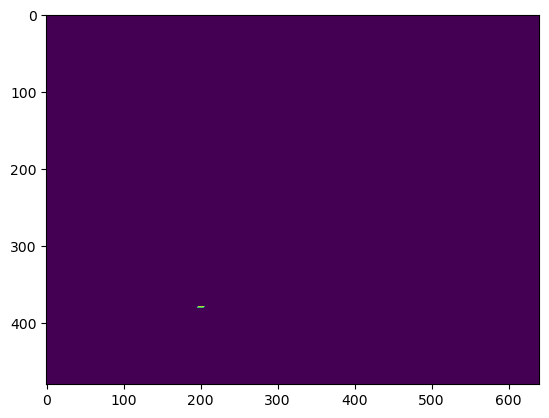

In [4]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A vertical kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


plt.imshow(img_final_bin)
plt.show()

In [5]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = contours, hierarchy

In [6]:
idx = 0
lb = 50
hb = 60
dir_path = "images/"
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w >= lb and h >= lb) and (w <= hb and h <= hb):
        idx += 1
        new_img = image[y:y+h, x:x+w]
        cv2.imwrite(dir_path+str(idx) + '.png', new_img)